## Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Basis functions ($\sin(\theta), \sin(2\theta) ...$)

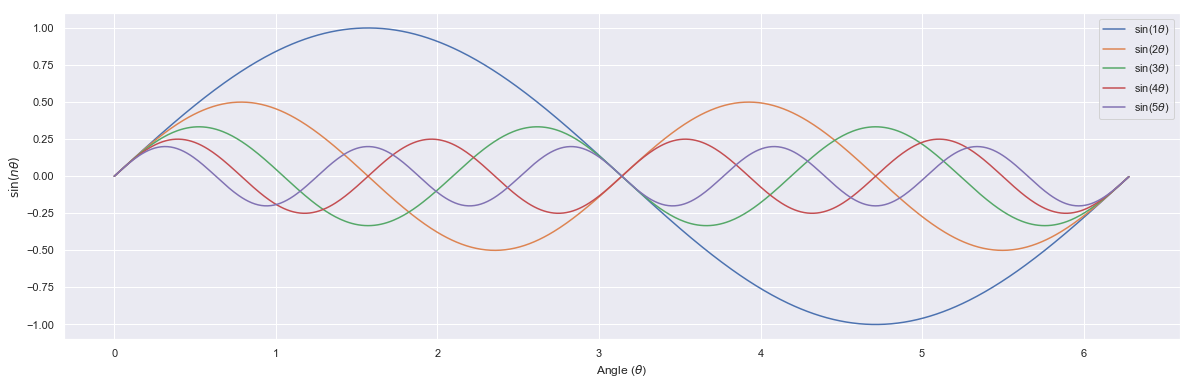

In [2]:
fs = 100
thetas = np.arange(0,2*np.pi,1/fs)

plt.figure(figsize = [20,6])

for i in range(1,6):
    amp = 1*1/float(i)
    
    '''Y= A sin(n.theta)'''
    ys = amp*np.sin(i*thetas)
    
    lb="sin("+str(i)+ r'$\theta$)'
    plt.plot(thetas,ys, label= lb)
    
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel(r'$\sin(n\theta)$')
plt.legend()
plt.show()

|  Basis function |  Periodicity |  
|---|---|
| $sin(\theta)$ |  2$\pi$ |   
|$sin(2\theta)$  | $\pi$  |  
| $sin(3\theta)$  | 2$\pi$/3  |  
| $sin(4\theta)$  | $\pi$/4 |  

### Basis functions ($\cos(\theta), \cos(2\theta) ...$)

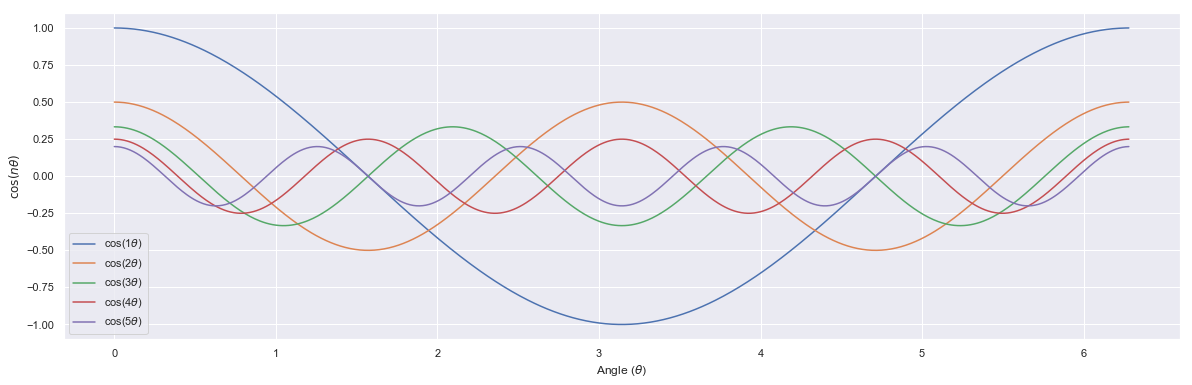

In [3]:
fs = 100
thetas = np.arange(0,2*np.pi,1/fs)

plt.figure(figsize = [20,6])

for i in range(1,6):
    amp = 1*1/float(i)
    
    '''Y= A sin(n.theta)'''
    ys = amp*np.cos(i*thetas)
    
    lb = "cos("+str(i)+ r'$\theta$)'
    plt.plot(thetas,ys, label=lb)
    
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel(r'$\cos(n\theta)$')
plt.legend()
plt.show()

|  Basis function |  Periodicity |  
|---|---|
| $cos(\theta)$ |  2$\pi$ |   
|$cos(2\theta)$  | $\pi$  |  
| $cos(3\theta)$  | 2$\pi$/3  |  
| $cos(4\theta)$  | $\pi$/4 |  

### Basis functions ($\sin(\theta), \sin(\theta/2) ...$)

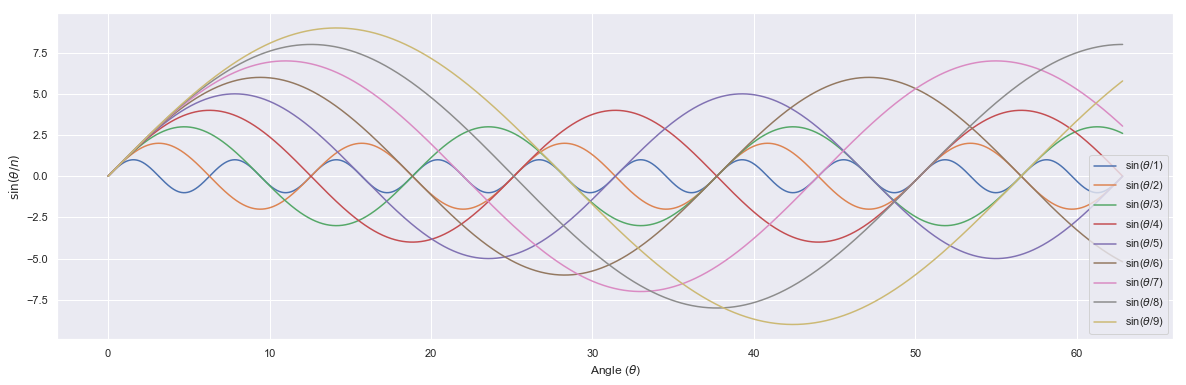

In [4]:
fs = 100
thetas = np.arange(0,20*np.pi,1/fs)

plt.figure(figsize = [20,6])

for i in range(1,10):
    amp = 1*float(i)
    
    '''Y= A sin(n.theta)'''
    ys = amp*np.sin(thetas/float(i))
    
    lb = "sin("+r'$\theta$/'+str(i)+")"
    plt.plot(thetas,ys, label= lb)
    
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel(r'$\sin(\theta/n)$')
plt.legend()
plt.show()

#### Assignment: What are the periodicites?

### Basis functions ($\cos(\theta), \cos(\theta/2) ...$)

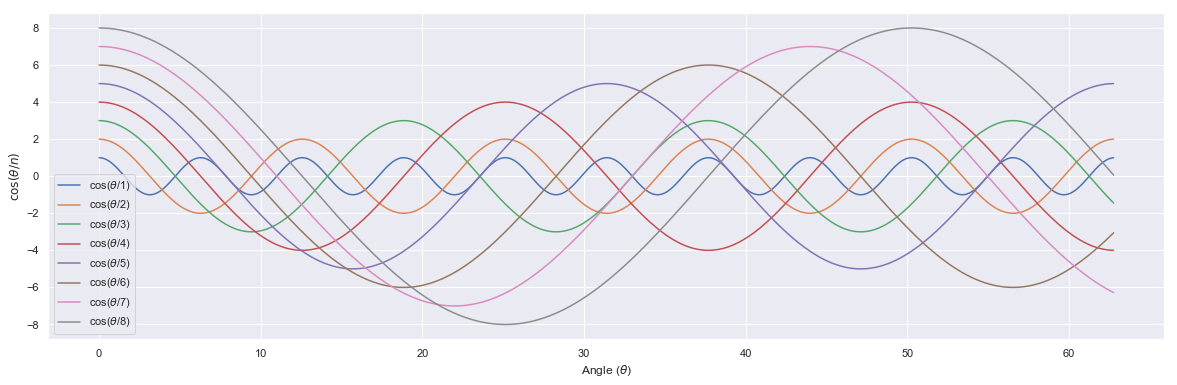

In [5]:
fs = 100
thetas = np.arange(0,20*np.pi,2*np.pi/fs)

plt.figure(figsize = [20,6])

for i in range(1,9):
    amp = 1*float(i)
    
    '''Y= A sin(n.theta)'''
    ys = amp*np.cos(thetas/float(i))
    
    lb="cos("+r'$\theta$/'+str(i)+")"
    plt.plot(thetas,ys, label= lb)
    
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel(r'$\cos(\theta/n)$')
plt.legend()
plt.show()

#### Assignment: What are the periodicites?

---------------

### A : Fourier Series: [Square Wave](https://mathworld.wolfram.com/FourierSeriesSquareWave.html)

![img](https://mathworld.wolfram.com/images/equations/FourierSeriesSquareWave/NumberedEquation3.gif)

#### 1. Individual basis function terms: 
Here we want to plot the individual terms in the above series to compere the periodicity and amplitudes.

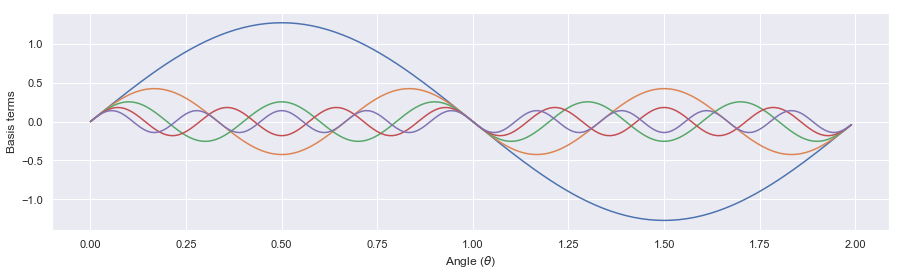

In [6]:
L = 1
ns =100
thetas = np.arange(0,2,1/ns)

plt.figure(figsize = [15,4])

for n in [i for i in range(10) if i%2 !=0]:
    
    '''creating individual terms in the series'''
    fs = (4/np.pi)*(1/n)*np.sin(n*np.pi*thetas/float(L))
    
    plt.plot(thetas,fs)
    
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel("Basis terms")
plt.show()

#### 2.Subsequent development by adding terms
Here we want to observe the plote of terms (e.g., first term, sum of first two terms, sum of first three terms) to realize how final series is developed by contibution of individual terms.

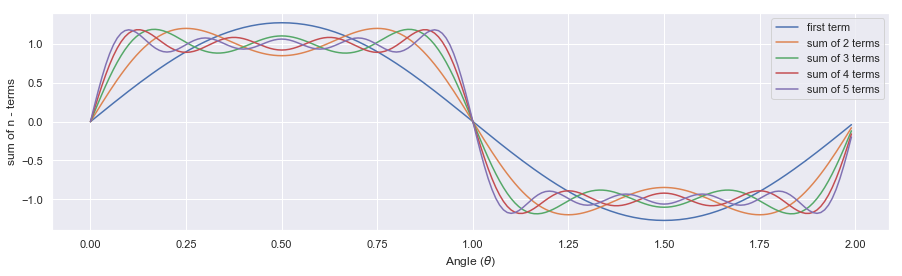

In [7]:
L = 1
ns =100
thetas = np.arange(0,2,1/ns)
plt.figure(figsize = [15,4])

k = 1
for n in [i for i in range(10) if i%2 != 0]:
    if n == 1:
        '''taking care of first term'''
        fi = (4/np.pi)*(1/n)*np.sin(n*np.pi*thetas/float(L))
        plt.plot(thetas,fi, label = "first term")
        ff = fi
        
    else:
        '''terms following first term'''
        fi = ff + (4/np.pi)*(1/n)*np.sin(n*np.pi*thetas/float(L))
        plt.plot(thetas,fi, label = "sum of "+str(k)+" terms")
        
        ff = fi
        
    k = k+1
                 
plt.legend()
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel('sum of n - terms')
plt.show()

#### 3. Sum of all n-terms

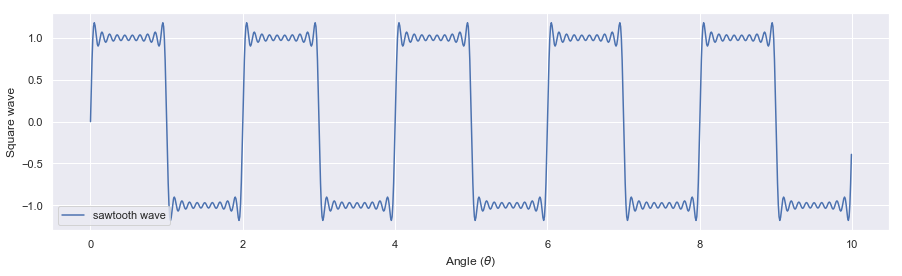

In [8]:
L = 1
ns =100
thetas = np.arange(0,10,1/ns)
plt.figure(figsize = [15,4])

'''including n = 1,3,5,...19th terms in basis expansison'''
fs = sum([(4/np.pi*(1/n)*np.sin(n*np.pi*thetas/float(L))) for n in [i for i in range(20) if i%2 !=0]])

plt.plot(thetas,fs,label ="sawtooth wave")
plt.legend()
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel('Square wave')
plt.show()

--------------

### Assignment

Develope the Fourier series of Triangular wave following aboves method:
    ![img](https://mathworld.wolfram.com/images/equations/FourierSeriesTriangleWave/NumberedEquation1.gif)

-------------------

### B: Fourier Transform

#### Experiment 1: Signal without noise

In [14]:
fs = 100.0
ts= np.arange(0,10,1/fs)
freq_cos = [2,4,6,8,10,12]
freq_sin = [1,3,5,7,9]

'''prepare candidate signals'''
sigs = [np.cos(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts)  for f1,f2 in zip(freq_cos,freq_sin)]

'''resultant signal'''
rsig = sum(sigs)

In [18]:
fft_rsig = np.fft.fft(rsig)
fft_freq = np.fft.fftfreq(len(fft_rsig),1/fs)

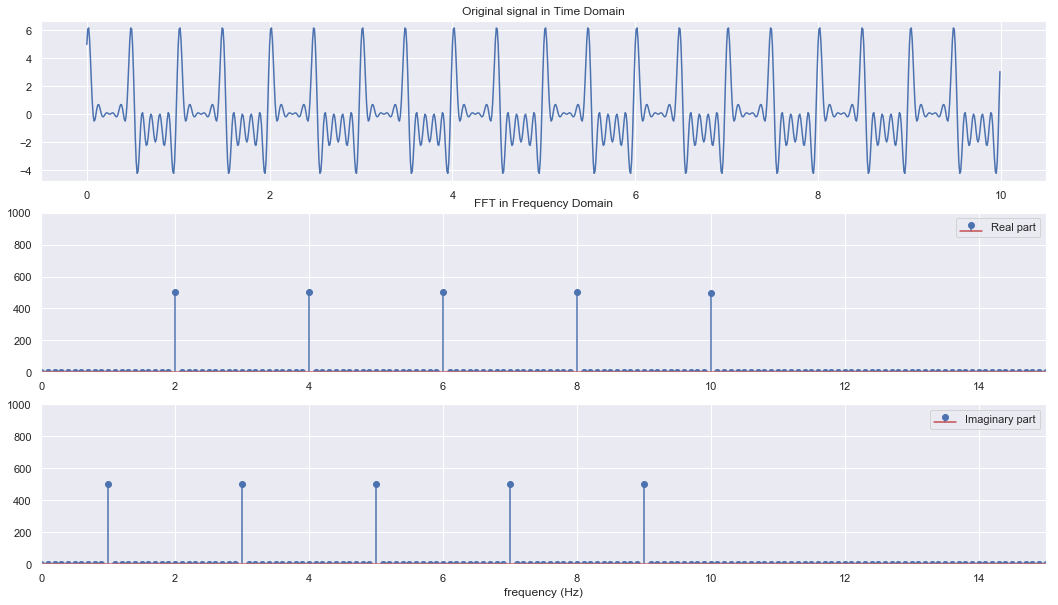

In [19]:
plt.figure(figsize = [18,10])

plt.subplot(311)
plt.plot(ts,rsig)
plt.title("Original signal in Time Domain")

plt.subplot(312)
plt.stem(fft_freq, abs(fft_rsig.real), label="Real part")
plt.title("FFT in Frequency Domain")
plt.ylim(0,1000)
plt.xlim(0,15)
plt.legend(loc=1)

plt.subplot(313)
plt.stem(fft_freq, abs(fft_rsig.imag),label="Imaginary part")
plt.xlabel("frequency (Hz)")
plt.legend(loc=1)
plt.xlim(0,15)
plt.ylim(0,1000)
plt.show()

#### Experiment 2: Signal with noise

In [23]:
fs = 100.0
ts= np.arange(0,10,1/fs)
freq_cos = [2,4,6,8,10,12]
freq_sin = [1,3,5,7,9]

'''prepare candidate signals'''
sigs = [np.cos(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts)  for f1,f2 in zip(freq_cos,freq_sin)]

'''resultant signal + noise'''
noise = 10*np.random.rand(len(rsig))
rsig_noise = sum(sigs) + noise

In [24]:
fft_rsig_noise = np.fft.fft(rsig_noise)
fft_freq_noise = np.fft.fftfreq(len(fft_rsig_noise),1/fs)

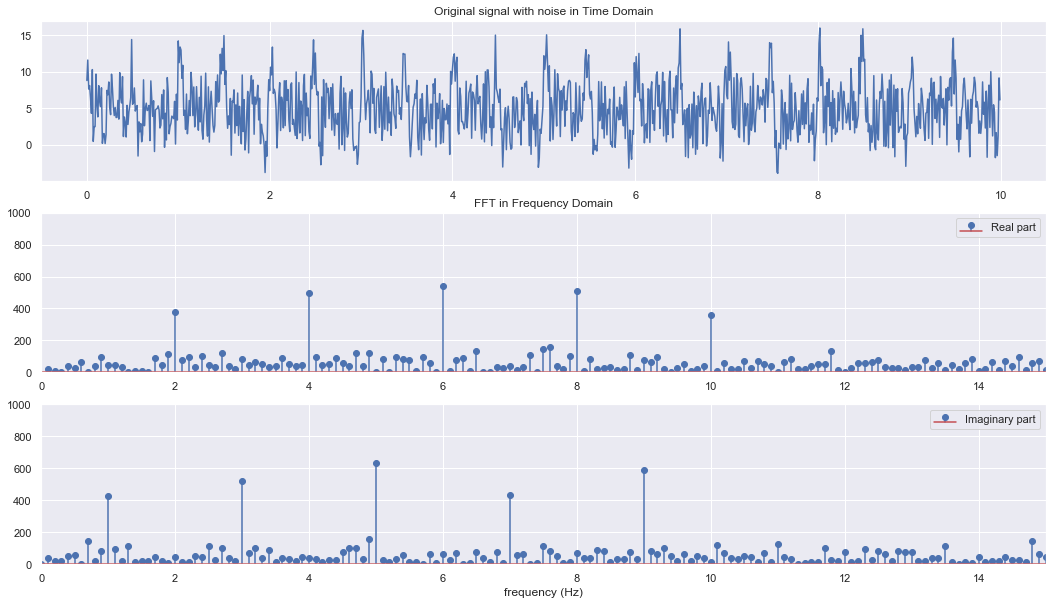

In [26]:
plt.figure(figsize = [18,10])

plt.subplot(311)
plt.plot(ts,rsig_noise)
plt.title("Original signal with noise in Time Domain")

plt.subplot(312)
plt.stem(fft_freq_noise, abs(fft_rsig_noise.real), label="Real part")
plt.title("FFT in Frequency Domain")
plt.ylim(0,1000)
plt.xlim(0,15)
plt.legend(loc=1)

plt.subplot(313)
plt.stem(fft_freq_noise, abs(fft_rsig_noise.imag),label="Imaginary part")
plt.xlabel("frequency (Hz)")
plt.legend(loc=1)
plt.xlim(0,15)
plt.ylim(0,1000)
plt.show()